In [16]:
CODE = '/Users/Lina/Documents/GitHub/habituation'
CODE="./"
#import sys, path, os
import sys,os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sys.path.append(CODE)
import system
from calc_util import sliding_maxnorm_ht
from adaint import integrate, default_steps_per_time, integrate2, default_h_max
  

#%% definitions

def simulate(f, p, X0, T, Ton, Amin, Amax,  N=20, hmax=0):
    
    # comment
    mys = system.System(f, p, X0, output_var_idx=-1, steps_per_time=100, hmax=hmax)
    mys.T = T
    mys.Ton = Ton
    mys.Amin = Amin
    mys.Amax = Amax
    

    
    ### apply N stimuli
    for i in range(0, N):
        # update initial condition and tvec
        if i==0:
            X = X0
            tvec_ = np.linspace(0, T, T*100)
        else:
            X = singlepeak_[-1, :]
            X[X < 0] = 0.0 
            tvec_ = np.linspace(tvec_[-1], tvec_[-1]+T, T*100)
            
        # integrate single stimulus
        _ , singlepeak_ = mys.apply_singlestimulus(X, T=T, Ton=Ton, Amin=Amin, Amax=Amax, 
                                                  tvec=None)
        if i==0:
            traj = singlepeak_
            tvec = tvec_
        else:    
            traj = np.concatenate([traj, singlepeak_])
            tvec = np.concatenate([tvec, tvec_])
            
        
    return [tvec, traj]


In [17]:
from scipy.signal import argrelmax, find_peaks
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


In [63]:
# CONCATENATED FEEDFORWARD
def f(X, t, S, kIa1, kIi1, kMa1, kMi1, kRa1, kRi1, K_1, kIa2, kIi2, kMa2, kMi2, kRa2, kRi2, K_2): 
    # starting values 
    I1, M1, R1, I2, M2, R2 = X
    # ODEs
    dI1 = S*kIa1*(1.0-I1) - kIi1*I1
    dM1 = I1*kMa1*(1.0-M1) - kMi1*M1
    dR1 = I1*kRa1*(1.0-R1) - M1*kRi1*R1/(K_1+R1)
    dI2 = R1*kIa2*(1.0-I2) - kIi2*I2
    dM2 = I2*kMa2*(1.0-M2) - kMi2*M2
    dR2 = I2*kRa2*(1.0-R2) - M2*kRi2*R2/(K_2+R2)

    return(dI1, dM1, dR1, dI2, dM2, dR2)

p = [ 0.023, 30, 17.7071, 0.038241, 57.9236, 1.39117, 0.0001, 
            0.016011, 14.3342,  4.33609, 0.001471, 26.1702, 45.9986, 0.79082] #only rates and ODE parameters
Ton = 1
Amin = 0.0

In [179]:
mpl.rcParams["font.size"]=16

../../habituation/2023_paper/figs/Fig_example.svg
../../habituation/2023_paper/figs/Fig_example.pdf


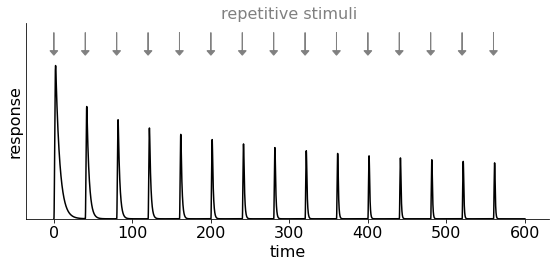

In [180]:
X0 = [0,0,0,0,0,0] 


color="k"

T=40
Amax=25
N=15
fig,ax=plt.subplots(1,1,figsize=(8,4))
    
kwargs={"N":N, "hmax":0.01}
       
parameter_list=[f, p, X0, T, Ton, Amin, Amax]
        
x, y= simulate(*parameter_list, N=N)
ax.plot(x,y[:,-1],color="k")
      
ax.set_xlabel("time")
ax.set_ylabel("response")
ax.spines[['right', 'top']].set_visible(False)

for i in range(0,T*N, T):
    ax.arrow(i, 0.0205, 0,-0.002, width=0.1*0.1, head_width=10,head_length=0.0005,color="gray") #max(y[:,-1])*1.1
    #ax.scatter(i,,marker="")
ax.text(300,0.022,"repetitive stimuli",horizontalalignment="center",color="gray")
ax.set_ylim(0,None)
ax.set_yticks([])
plt.tight_layout()
namesave="../../habituation/2023_paper/figs/Fig_example.svg"
print(namesave)
plt.savefig(namesave,bbox_inches="tight")
namesave=namesave.replace(".svg",".pdf")
print(namesave)
plt.savefig(namesave,bbox_inches="tight")
plt.show()






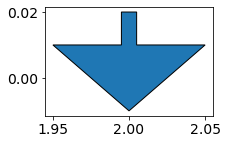

In [128]:
fig,ax=plt.subplots(1,1,figsize=(3,2))
ax.arrow(2,0.02, 0,-0.01, width=0.1*0.1, head_width=1*0.1,head_length=0.02) #max(y[:,-1])*1.1